# Heart attack prediction 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
#warnings.filterwarnings('ignore')


In [34]:
df = pd.read_csv('data/heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.20,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.20,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.40,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.20,1,1,3,0


In [35]:
df.info() ## look up type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [36]:
df.nunique() ## Gross glace data categorical condition.

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

# About this data:
About this dataset

Age : Age of the patient

Sex : Sex of the patient (male=1, female=0)

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [37]:
df.isna().sum() # check up na value.

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## About sex distribution

In [6]:
pd.value_counts(df['sex']) # male=1, female=0

1    207
0     96
Name: sex, dtype: int64

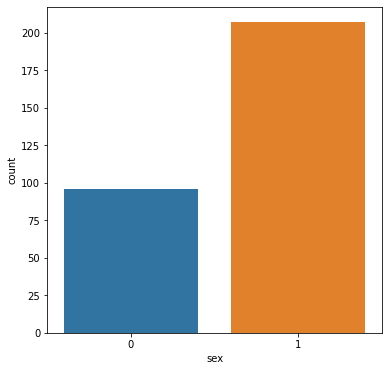

In [7]:
plt.figure(figsize=(6, 6))
sns.countplot(x="sex", data=df);

## About output distribution:

In [8]:
pd.value_counts(df['output']) # male=1, female=0

1    165
0    138
Name: output, dtype: int64

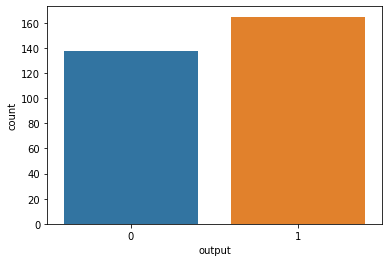

In [9]:
sns.countplot(x="output", data=df);

## About age distribution:

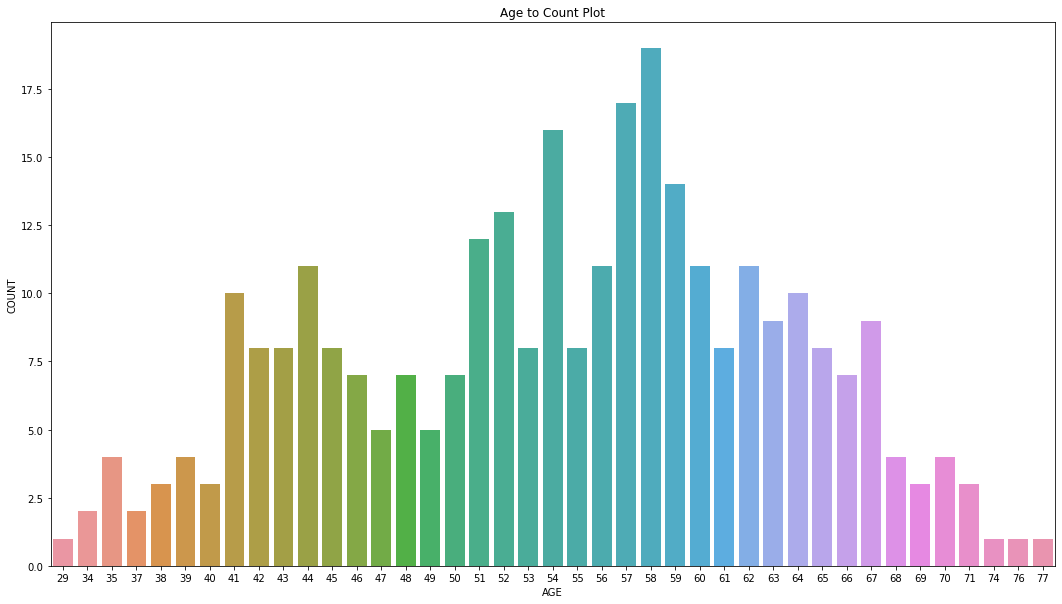

In [10]:
plt.figure(figsize=(18, 10))
sns.countplot(x=df["age"]);  # using countplot
plt.title("Age to Count Plot")
plt.xlabel("AGE")
plt.ylabel("COUNT")
plt.show();

## Other way for brief glance of data
       -pip install pandas_profiling 

In [11]:
import pandas_profiling as profile

ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
#profile.ProfileReport(df)

## Data variable correlation

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,10))
mask = np.zeros_like(corr,dtype=np.bool) #
mask[np.triu_indices_from(mask)] = True  #
sns.heatmap(corr, mask = mask, annot=True)
plt.show()

# Prepare data:

In [38]:
X_data = df.drop(['output'], axis = 1)
X_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2


In [39]:
Y_data = df['output']
Y_data

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [15]:
print('X shape: ',X_data.shape)
print('Y shape: ',Y_data.shape)

X shape:  (303, 13)
Y shape:  (303,)


# Prepare traning data set and test data set

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_data,Y_data,train_size=0.75,random_state=42)
x_train = pd.DataFrame(x_train,columns = df.drop(['output'],axis=1).columns)
x_train.index = range(x_train.shape[0])
x_test = pd.DataFrame(x_test,columns = df.drop(['output'],axis=1).columns)
x_test.index = range(x_test.shape[0])
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(227, 13) (227,)
(76, 13) (76,)


exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

##### cp : Chest Pain type chest pain type
##### Value 1: typical angina
##### Value 2: atypical angina
##### Value 3: non-anginal pain
##### Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

  ##### rest_ecg : resting electrocardiographic results
  ##### Value 0: normal
  ##### Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  ##### Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [41]:
num_features = ['age','trtbps','chol','thalachh','oldpeak']
cat_features = ['sex','cp','fbs','restecg','exng','slp','caa','thall']

# Scaling the numerical features

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
scaler.fit(x_train[num_features])
x_train_scaled = pd.DataFrame(scaler.transform(x_train[num_features]),columns=num_features)
x_test_scaled = pd.DataFrame(scaler.transform(x_test[num_features]),columns=num_features)

In [44]:
x_test_scaled

,age,trtbps,chol,thalachh,oldpeak
0,0.58,0.57,0.33,0.21,0.11
1,0.62,0.78,0.36,0.62,0.04
2,0.58,0.57,-0.01,0.75,0.04
3,0.56,0.41,0.64,0.54,0.34
4,0.87,0.16,0.31,0.37,0.00
...,...,...,...,...,...
71,0.27,0.47,0.22,0.79,0.00
72,0.69,0.57,0.26,0.58,0.25
73,0.40,0.29,0.21,0.86,0.00
74,0.73,0.52,0.19,0.39,0.36


In [45]:
x_train_scaled.shape

(227, 5)

In [48]:
x_train_scaled[cat_features] = x_train[cat_features]
x_test_scaled[cat_features] = x_test[cat_features]

In [49]:
x_train_scaled

,age,trtbps,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,slp,caa,thall
0,0.58,0.61,0.23,0.67,0.00,1,1,0,0,0,2,1,2
1,0.62,0.33,0.20,0.40,0.39,1,2,1,1,0,1,1,1
2,0.79,0.32,0.28,0.66,0.04,1,0,1,1,0,1,2,3
3,0.60,0.32,0.21,0.49,0.07,1,1,0,1,0,1,4,3
4,0.19,0.45,0.10,0.75,0.00,1,2,0,1,0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0.44,0.47,0.24,0.66,0.11,1,2,0,1,0,1,1,3
223,0.46,0.00,0.22,0.58,0.00,1,2,0,1,1,2,1,3
224,0.83,0.67,0.24,0.38,0.02,1,3,1,0,0,1,1,2
225,0.35,0.27,0.27,0.49,0.14,1,0,0,0,0,2,0,3
